# UberEats

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as mfm
from matplotlib.ticker import FormatStrFormatter
from collections import Counter
from wordcloud import WordCloud

In [83]:
font_path = "SourceHanSerifTC-Medium.otf"
prop = mfm.FontProperties(fname=font_path)

In [84]:
import jieba
jieba.set_dictionary('dict.txt.big')
with open('stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 
stops.append(' ')

In [85]:
ubereats = pd.read_csv('Ubereats.csv', dtype = str)
ubereats.set_index('Unnamed: 0', inplace = True)
del ubereats.index.name

ubereats['Review Date'] = pd.to_datetime(ubereats['Review Date'], format = '%Y年%m月%d日')
ubereats[['Reviewer Ratings', 'Review Likes']] = ubereats[['Reviewer Ratings', 'Review Likes']].astype(int)

ubereats.head()

,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
1,*芙亞,2019-06-04,4,比熊貓快，可選的範圍也比熊貓遠，追蹤系統也很準確又方便，不過優惠較少，想問之前可以看到店家...,NaN,4
2,Jun Lin,2019-06-04,4,為什麼麥當勞超值全餐沒有升級飲料的選項，只能另外加點,NaN,4
3,TT SS,2019-06-05,5,給的優惠很大，新用戶可以便宜吃到各家食物，若有貨到付款服務會更好~,NaN,1
4,Kohan Wang,2019-06-05,4,六月限時美食優惠，使用代碼eats-dvsp3u66ue即可領取$200折抵五次，使用期限...,NaN,45
5,醬醬,2019-06-04,5,輸入優惠碼拿折價券喔eats-zsxw3r 讓你首次購物折很多!,NaN,2


In [86]:
df1 = ubereats[['Review Date', 'Reviewer Ratings']].copy()
#df1 = df1.groupby(['Review Date'], as_index = False).mean()
df1['YM'] = df1['Review Date'].values.astype('datetime64[M]')
df1 = df1.groupby(['YM'], as_index = False).mean()

df1.head()

,YM,Reviewer Ratings
0,2016-10-01,1.916667
1,2016-11-01,3.293413
2,2016-12-01,3.314815
3,2017-01-01,3.104167
4,2017-02-01,4.097561


Text(0,0.5,'Rating')

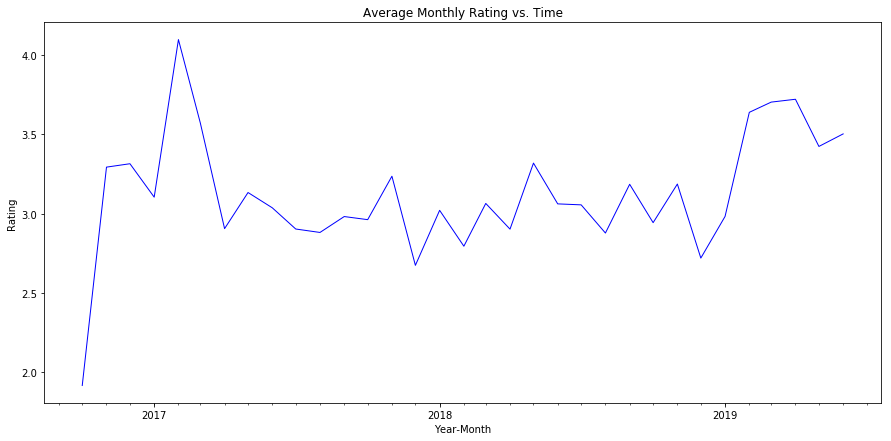

In [87]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(df1['YM'], df1['Reviewer Ratings'], lw = 1, color = 'blue', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax.set_title('Average Monthly Rating vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Rating')

Weight Explanation:

算法：(評分 x (like+1))的一天加總 / (like總數 + 評分數)
例如：X 天有2個評論。一個是4星，like = 4；另一個是1星，like = 2。 (4 x (4+1) + 1 x (2+1)) / ((4+2)+2) = 2.875

In [88]:
df2 = ubereats[['Review Date', 'Reviewer Ratings', 'Review Likes']].copy()
df2['Review Likes'] += 1
df2['Weighted Ratings'] = df2['Reviewer Ratings'] * df2['Review Likes']
df2['YM'] = df2['Review Date'].values.astype('datetime64[M]')
df2 = df2.groupby(['YM'], as_index = False).sum()
df2['Weighted Final'] = df2['Weighted Ratings'] / df2['Review Likes']

df2.head()

,YM,Reviewer Ratings,Review Likes,Weighted Ratings,Weighted Final
0,2016-10-01,115,238,397,1.668067
1,2016-11-01,550,354,942,2.661017
2,2016-12-01,716,585,1741,2.976068
3,2017-01-01,149,141,454,3.219858
4,2017-02-01,168,129,508,3.937984


Text(0,0.5,'Rating')

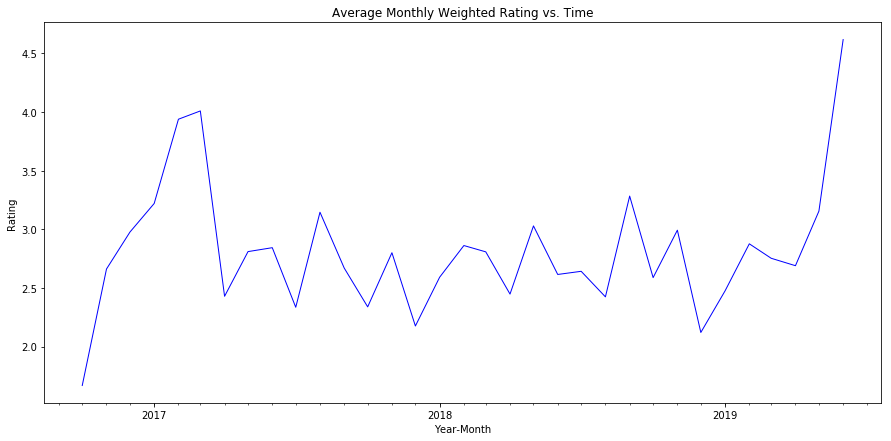

In [89]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(df2['YM'], df2['Weighted Final'], lw = 1, color = 'blue', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax.set_title('Average Monthly Weighted Rating vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Rating')

In [90]:
ue_template = ubereats[["Reviewer Ratings", "Review Body"]].copy()
ubereats1 = ue_template[ue_template["Reviewer Ratings"] == 1]
ubereats2 = ue_template[ue_template["Reviewer Ratings"] == 2]
ubereats3 = ue_template[ue_template["Reviewer Ratings"] == 3]
ubereats4 = ue_template[ue_template["Reviewer Ratings"] == 4]
ubereats5 = ue_template[ue_template["Reviewer Ratings"] == 5]

ue_rating1 = ubereats1["Review Body"].values
ue_rating2 = ubereats2["Review Body"].values
ue_rating3 = ubereats3["Review Body"].values
ue_rating4 = ubereats4["Review Body"].values
ue_rating5 = ubereats5["Review Body"].values

ue_rating5

array([' 給的優惠很大，新用戶可以便宜吃到各家食物，若有貨到付款服務會更好~',
       ' 輸入優惠碼拿折價券喔eats-zsxw3r 讓你首次購物折很多!',
       ' 只要使用我的邀請代碼：eats-8rr6z6e3ue，首 2 次透過 #Uber Eats 優食訂購即可享有 NT$60 的折扣優惠。',
       ..., ' 讚讚', ' 😁😁😁😁', ' 👍'], dtype=object)

In [91]:
ue1_terms = []
ue2_terms = []
ue3_terms = []
ue4_terms = []
ue5_terms = []

for rating in ue_rating1:   
    for t in jieba.cut(rating):
        if t not in stops:
            ue1_terms.append(t)

for rating in ue_rating2:   
    for t in jieba.cut(rating):
        if t not in stops:
            ue2_terms.append(t)

for rating in ue_rating3:   
    for t in jieba.cut(rating):
        if t not in stops:
            ue3_terms.append(t)

for rating in ue_rating4:   
    for t in jieba.cut(rating):
        if t not in stops:
            ue4_terms.append(t)

for rating in ue_rating5:   
    for t in jieba.cut(rating):
        if t not in stops:
            ue5_terms.append(t)

#sorted(Counter(ue5_terms).items(), key=lambda x:x[1], reverse=True)

Building prefix dict from C:\Users\kharr\Documents\Data Science\dict.txt.big ...
Loading model from cache C:\Users\kharr\AppData\Local\Temp\jieba.ua93e3f0d2330a0587391d6f3a1e8b0e4.cache
Loading model cost 3.006 seconds.
Prefix dict has been built succesfully.


In [92]:
ue1_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
ue1_wordcloud.generate_from_frequencies(frequencies=Counter(ue1_terms))

ue2_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
ue2_wordcloud.generate_from_frequencies(frequencies=Counter(ue2_terms))

ue3_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
ue3_wordcloud.generate_from_frequencies(frequencies=Counter(ue3_terms))

ue4_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
ue4_wordcloud.generate_from_frequencies(frequencies=Counter(ue4_terms))

ue5_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
ue5_wordcloud.generate_from_frequencies(frequencies=Counter(ue5_terms))

Text(0.5,1,'5 Stars')

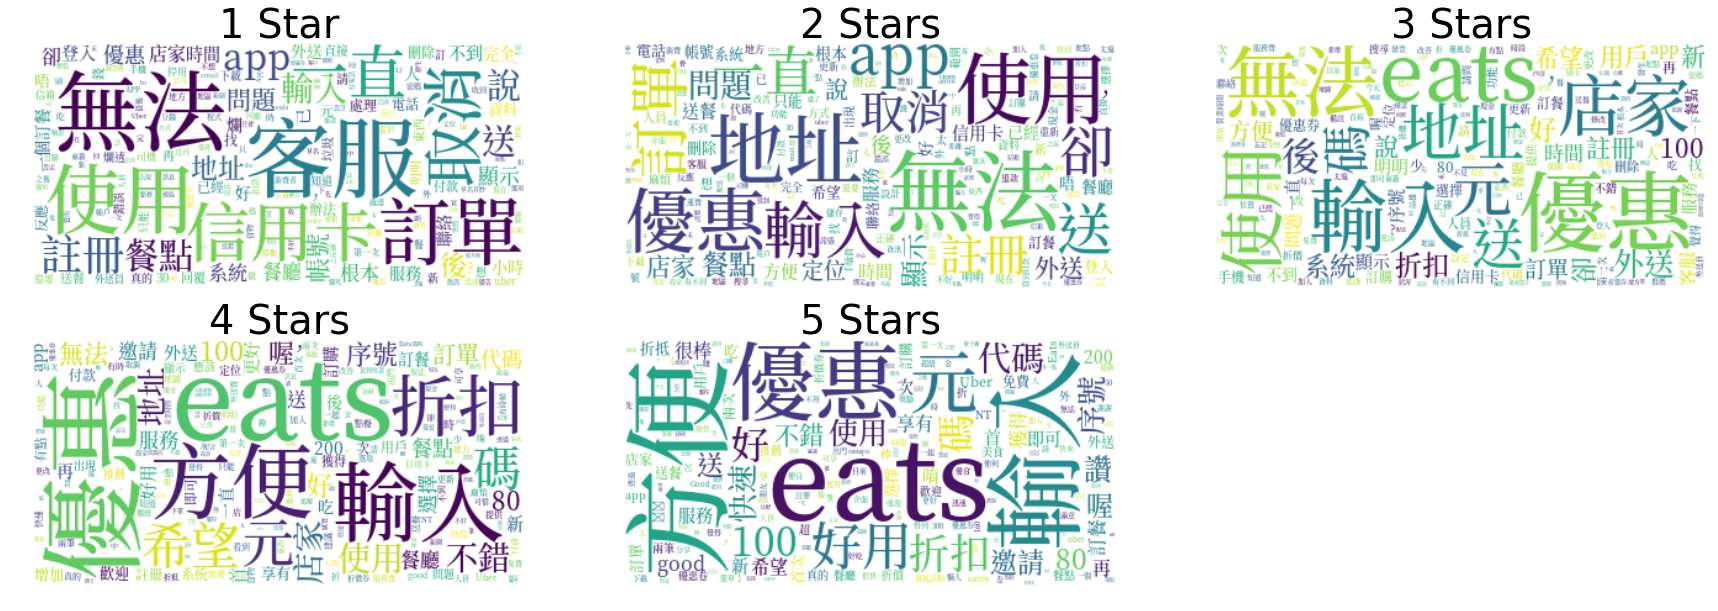

In [93]:
fig = plt.figure(figsize = (30,10))

ax1 = fig.add_subplot(231)
ax1.imshow(ue1_wordcloud, interpolation = "bilinear")
ax1.axis("off")
ax1.set_title("1 Star", size = 40)

ax2 = fig.add_subplot(232)
ax2.imshow(ue2_wordcloud, interpolation = "bilinear")
ax2.axis("off")
ax2.set_title("2 Stars", size = 40)

ax3 = fig.add_subplot(233)
ax3.imshow(ue3_wordcloud, interpolation = "bilinear")
ax3.axis("off")
ax3.set_title("3 Stars", size = 40)

ax4 = fig.add_subplot(234)
ax4.imshow(ue4_wordcloud, interpolation = "bilinear")
ax4.axis("off")
ax4.set_title("4 Stars", size = 40)

ax5 = fig.add_subplot(235)
ax5.imshow(ue5_wordcloud, interpolation = "bilinear")
ax5.axis("off")
ax5.set_title("5 Stars", size = 40)

#plt.figure(figsize=(10,10))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()
#"""

# Deliveroo

In [94]:
deliveroo = pd.read_csv('deliveroo.csv', dtype = str)
deliveroo.set_index('Unnamed: 0', inplace = True)
del deliveroo.index.name

deliveroo['Review Date'] = pd.to_datetime(deliveroo['Review Date'], format = '%Y年%m月%d日')
deliveroo[['Reviewer Ratings', 'Review Likes']] = deliveroo[['Reviewer Ratings', 'Review Likes']].astype(int)

deliveroo.head()

,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
1,Ivy Chang,2019-06-05,5,很清楚明白易操作,Deliveroo2019年6月5日您好！\r\n\r\n感謝閣下寶貴之意見。\r\n\r\...,0
2,wing kin Szeto,2019-06-05,4,食物很好,Deliveroo2019年6月5日您好！\r\n\r\n感謝閣下寶貴之意見。\r\n\r\...,0
3,Jordy Ho,2019-06-05,5,方便易用,Deliveroo2019年6月5日您好！\r\n\r\n感謝閣下寶貴之意見。\r\n\r\...,0
4,kwok chunchun,2019-06-05,1,太慢,Deliveroo2019年6月5日您好！\r\n\r\n感謝閣下寶貴之意見。\r\n\r\...,0
5,Google 使用者,2019-05-26,1,常常說已準備好的食物找不到人送餐，那我應該等還是不等?沒有聯絡電話可供查詢，煮好的食物又不...,Deliveroo2019年5月26日Do email in to support@deli...,9


In [95]:
df4 = deliveroo[['Review Date', 'Reviewer Ratings']].copy()
df4['YM'] = df4['Review Date'].values.astype('datetime64[M]')
df4 = df4.groupby(['YM'], as_index = False).mean()

df4.head()

,YM,Reviewer Ratings
0,2016-05-01,5.000000
1,2016-06-01,5.000000
2,2016-07-01,3.000000
3,2016-08-01,1.000000
4,2016-09-01,1.166667


Text(0,0.5,'Rating')

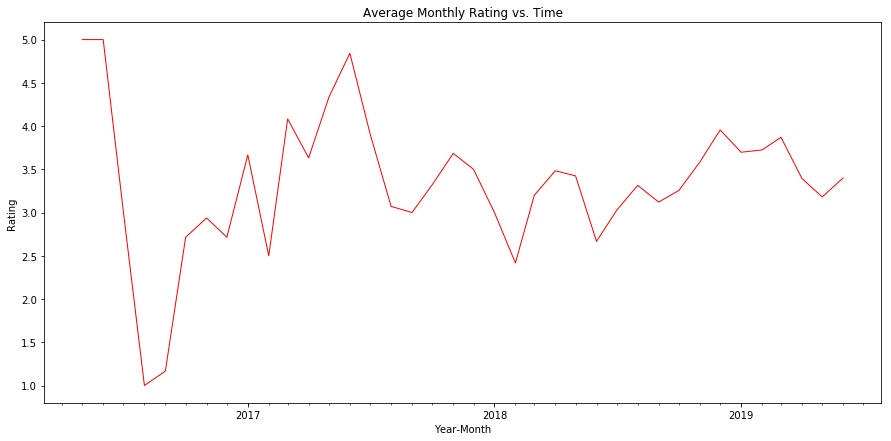

In [96]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(df4['YM'], df4['Reviewer Ratings'], lw = 1, color = 'red', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.set_title('Average Monthly Rating vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Rating')

In [97]:
df6 = deliveroo[['Review Date', 'Reviewer Ratings', 'Review Likes']].copy()
df6['Review Likes'] += 1
df6['Weighted Ratings'] = df6['Reviewer Ratings'] * df6['Review Likes']
df6['YM'] = df6['Review Date'].values.astype('datetime64[M]')
df6 = df6.groupby(['YM'], as_index = False).sum()
df6['Weighted Final'] = df6['Weighted Ratings'] / df6['Review Likes']

df6.head()

,YM,Reviewer Ratings,Review Likes,Weighted Ratings,Weighted Final
0,2016-05-01,5,6,30,5.000000
1,2016-06-01,5,4,20,5.000000
2,2016-07-01,24,33,101,3.060606
3,2016-08-01,3,6,6,1.000000
4,2016-09-01,7,25,37,1.480000


Text(0,0.5,'Rating')

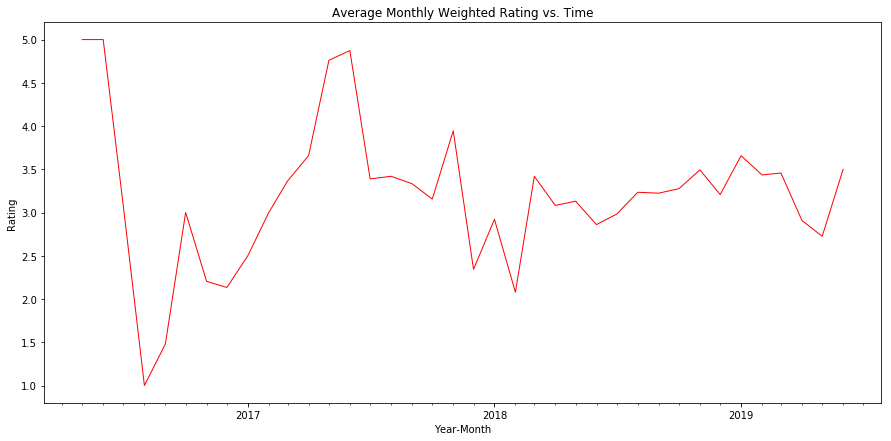

In [98]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(df6['YM'], df6['Weighted Final'], lw = 1, color = 'red', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.set_title('Average Monthly Weighted Rating vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Rating')

In [100]:
dv_template = deliveroo[["Reviewer Ratings", "Review Body"]].copy()
deliveroo1 = dv_template[dv_template["Reviewer Ratings"] == 1]
deliveroo2 = dv_template[dv_template["Reviewer Ratings"] == 2]
deliveroo3 = dv_template[dv_template["Reviewer Ratings"] == 3]
deliveroo4 = dv_template[dv_template["Reviewer Ratings"] == 4]
deliveroo5 = dv_template[dv_template["Reviewer Ratings"] == 5]

dv_rating1 = deliveroo1["Review Body"].values
dv_rating2 = deliveroo2["Review Body"].values
dv_rating3 = deliveroo3["Review Body"].values
dv_rating4 = deliveroo4["Review Body"].values
dv_rating5 = deliveroo5["Review Body"].values

dv_rating5

array([' 很清楚明白易操作', ' 方便易用',
       ' 第一次使用還不錯，雖然過程有外送員找不到人，延遲了一點時間，但10分鐘內，就接到2通客服詢問電話，希望未來能多些優惠活動和地點和餐廳選擇，還有App能有個加入我的最愛的餐廳，以便方便選擇，謝謝',
       ' 很棒！但折價券希望能選擇此次是否要使用，還有希望能有加入我的最愛此功能！', ' 除了客服很問號之外本身外送都不錯',
       ' 很有趣的體驗，只是我家附近能送的店好少啊XDD', ' 方便，客服服務也快速，家中有長輩跟小孩的好幫手',
       ' 很快就到了 夏天吃冰！我一定用戶戶送', ' 簡單方便易懂', ' 希望關渡區域也可以配送', ' 優惠好 服務快',
       ' Very Good!', ' 很即時 不錯', ' 方便且快速', ' 非常簡單使用，送餐快速。', ' 第一次體驗，不錯！',
       ' 幾好，好放便', ' 很棒，又快速', ' 不錯，都非常準時到。', ' 方便快速', ' 好用', ' 好用', ' 好用',
       ' 蠻方便的', ' 好棒', ' 很棒', ' 很好', ' 很棒👍', ' 快，平', ' awosome', ' 不錯',
       ' 棒', ' 超快的', ' good', ' 還不錯...', ' 🙂',
       ' 蠻方便的，目前滿150就免運 新用戶還有250折100', ' 很好用，希望有跟多店家可以加入',
       ' 介面清楚，插圖可愛，比UBEREAT好用喔', ' 目前使用起來 介面與服務最好的外送平台',
       ' 服務很好很準時，但希望新北能有更多店家',
       " normally it's ok but sometimes the people make some errors on the numbers of food ....",
       ' 很快送餐，服務也好，少餐點客服也能很快處理', ' 好用過e 肚仔', ' 介面容易了解，進度通知令人安心',
       ' 讚 免送餐費', ' 很方便欸!!!前三次還送100抵用，不限金額，真大方。', ' 感謝口罩哥的推薦',
       ' 新莊不能用，只能在公司用了

In [101]:
dv1_terms = []
dv2_terms = []
dv3_terms = []
dv4_terms = []
dv5_terms = []

for rating in dv_rating1:   
    for t in jieba.cut(rating):
        if t not in stops:
            dv1_terms.append(t)

for rating in dv_rating2:   
    for t in jieba.cut(rating):
        if t not in stops:
            dv2_terms.append(t)

for rating in dv_rating3:   
    for t in jieba.cut(rating):
        if t not in stops:
            dv3_terms.append(t)

for rating in dv_rating4:   
    for t in jieba.cut(rating):
        if t not in stops:
            dv4_terms.append(t)

for rating in dv_rating5:   
    for t in jieba.cut(rating):
        if t not in stops:
            dv5_terms.append(t)

#sorted(Counter(ue5_terms).items(), key=lambda x:x[1], reverse=True)

In [103]:
dv1_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
dv1_wordcloud.generate_from_frequencies(frequencies=Counter(dv1_terms))

dv2_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
dv2_wordcloud.generate_from_frequencies(frequencies=Counter(dv2_terms))

dv3_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
dv3_wordcloud.generate_from_frequencies(frequencies=Counter(dv3_terms))

dv4_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
dv4_wordcloud.generate_from_frequencies(frequencies=Counter(dv4_terms))

dv5_wordcloud = WordCloud(background_color = "white", font_path="SourceHanSerifTC-Medium.otf")
dv5_wordcloud.generate_from_frequencies(frequencies=Counter(dv5_terms))

Text(0.5,1,'5 Stars')

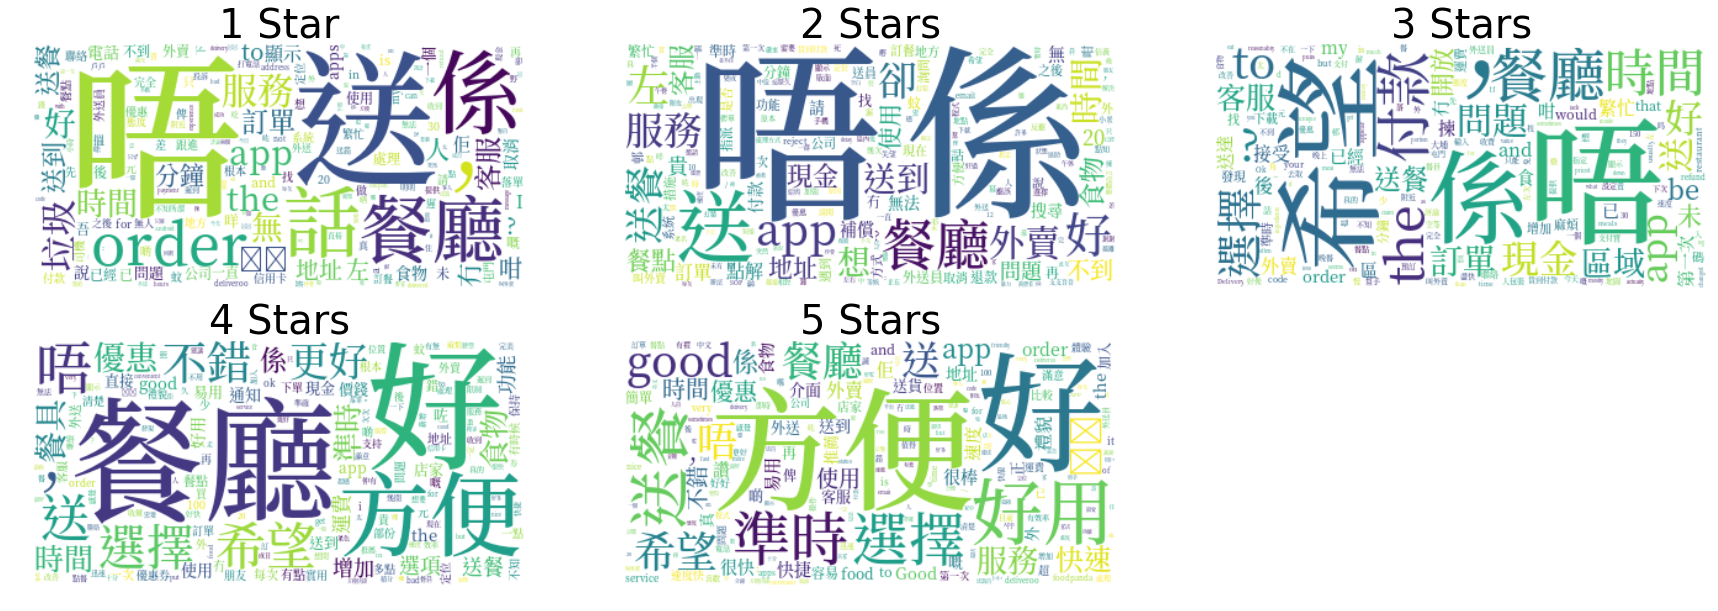

In [104]:
fig = plt.figure(figsize = (30,10))

ax1 = fig.add_subplot(231)
ax1.imshow(dv1_wordcloud, interpolation = "bilinear")
ax1.axis("off")
ax1.set_title("1 Star", size = 40)

ax2 = fig.add_subplot(232)
ax2.imshow(dv2_wordcloud, interpolation = "bilinear")
ax2.axis("off")
ax2.set_title("2 Stars", size = 40)

ax3 = fig.add_subplot(233)
ax3.imshow(dv3_wordcloud, interpolation = "bilinear")
ax3.axis("off")
ax3.set_title("3 Stars", size = 40)

ax4 = fig.add_subplot(234)
ax4.imshow(dv4_wordcloud, interpolation = "bilinear")
ax4.axis("off")
ax4.set_title("4 Stars", size = 40)

ax5 = fig.add_subplot(235)
ax5.imshow(dv5_wordcloud, interpolation = "bilinear")
ax5.axis("off")
ax5.set_title("5 Stars", size = 40)